# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
   

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            
            # Extract Data
            city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city = city_weather.get("name")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_humidity  = city_weather.get("main", {}).get("humidity")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_pressure = city_weather.get("main", {}).get("pressure")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
            

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Pressure": city_pressure,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
# pause to avoid rate limiting
time.sleep(1)



# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | arenapolis
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | xiangcheng chengguanzhen
Processing Record 7 of Set 1 | nouadhibou
Processing Record 8 of Set 1 | puerto baquerizo moreno
Processing Record 9 of Set 1 | shahrak
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | kapuskasing
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | aripuana
Processing Record 14 of Set 1 | flin flon
Processing Record 15 of Set 1 | peace river
Processing Record 16 of Set 1 | 'ohonua
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | bikenibeu village
Processing Record 19 of Set 1 | tabas
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | harstad
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Pressure      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,63.50,1009,92,96,27.13,SH,1735610943
1,West Island,-12.1568,96.8225,84.18,1011,79,20,5.75,CC,1735610943
2,Hadibu,12.6500,54.0333,71.94,1016,77,74,6.89,YE,1735610943
3,Arenápolis,-14.4503,-56.8461,71.71,1011,94,100,8.10,BR,1735610880
4,Grytviken,-54.2811,-36.5092,43.00,1013,78,93,8.14,GS,1735610943


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,63.50,1009,92,96,27.13,SH,1735610943
1,West Island,-12.1568,96.8225,84.18,1011,79,20,5.75,CC,1735610943
2,Hadibu,12.6500,54.0333,71.94,1016,77,74,6.89,YE,1735610943
3,Arenápolis,-14.4503,-56.8461,71.71,1011,94,100,8.10,BR,1735610880
4,Grytviken,-54.2811,-36.5092,43.00,1013,78,93,8.14,GS,1735610943


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

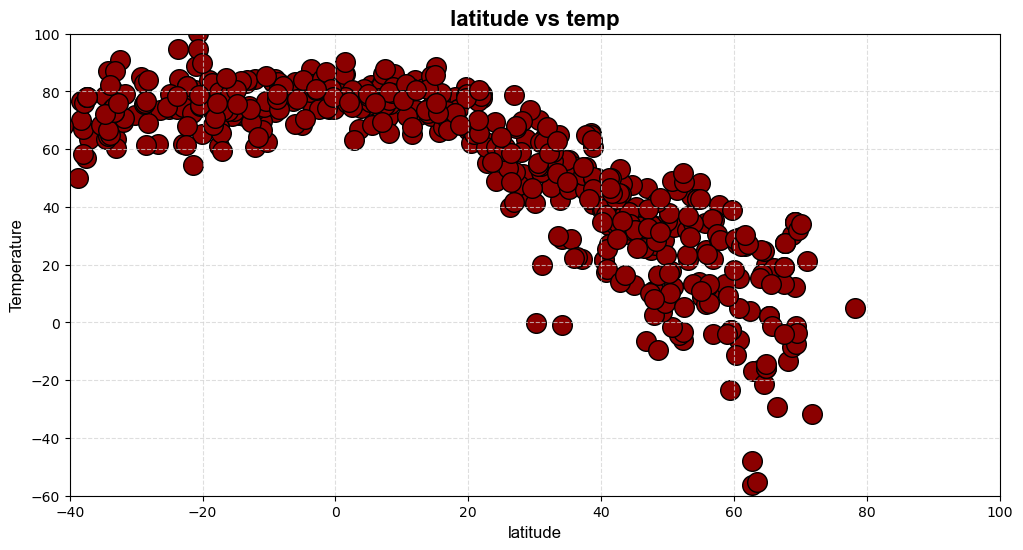

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="darkred", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("latitude vs temp", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(-60, 100)
plt.xlim(-40, 100)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

#### Latitude Vs. Humidity

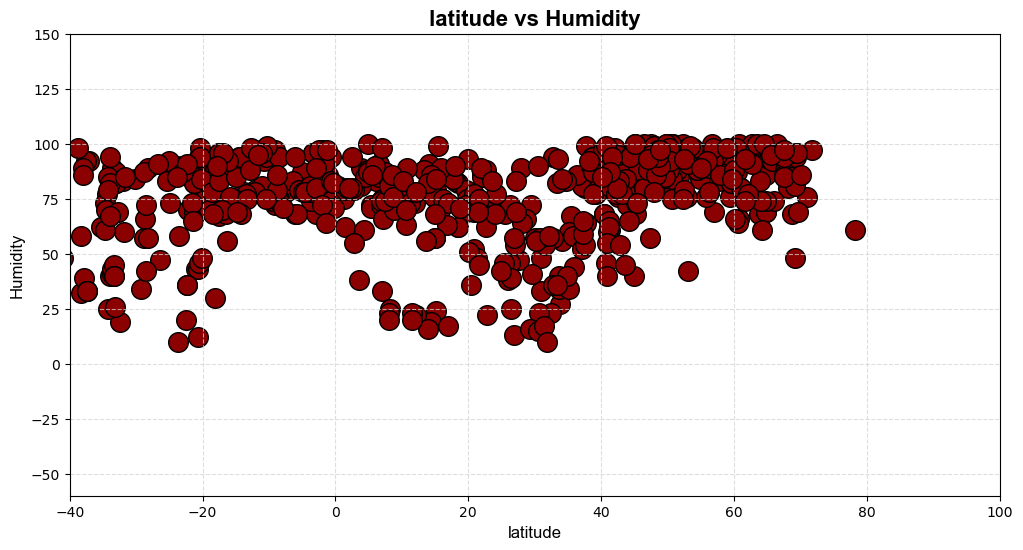

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Humidity"], color="darkred", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(-60, 150)
plt.xlim(-40, 100)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

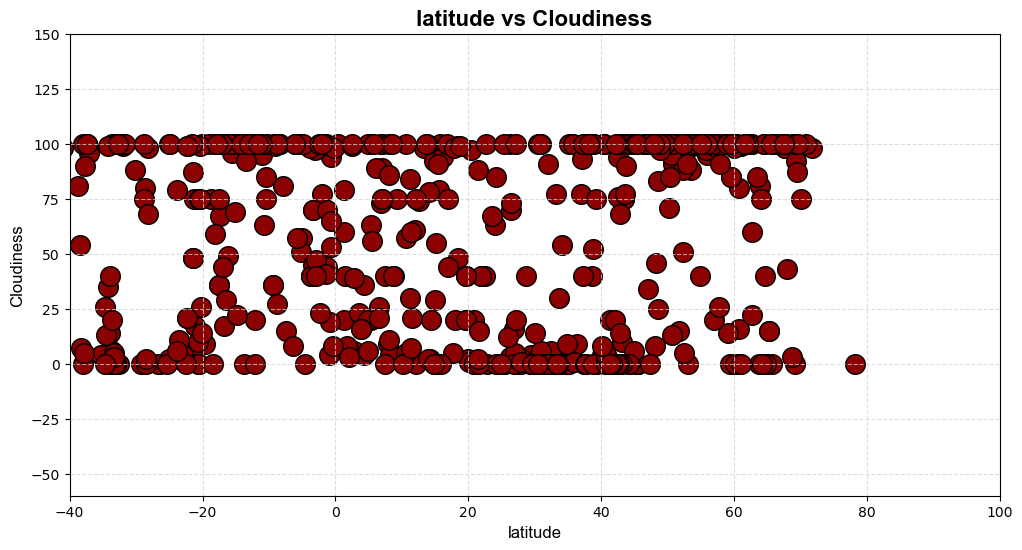

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Cloudiness"], color="darkred", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(-60, 150)
plt.xlim(-40, 100)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

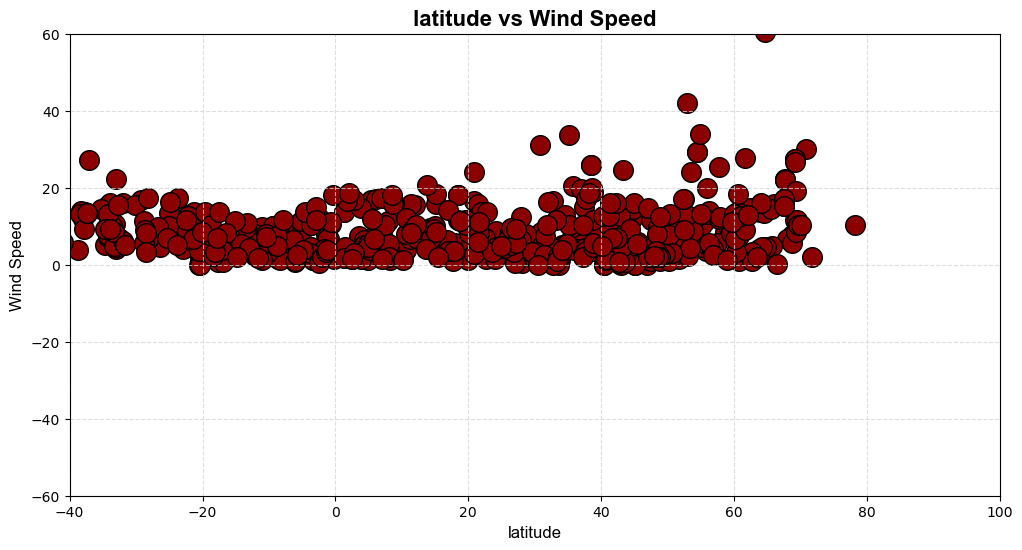

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="darkred", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(-60, 60)
plt.xlim(-40, 100)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkred", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hadibu,12.6500,54.0333,71.94,1016,77,74,6.89,YE,1735610943
1,Xiangcheng Chengguanzhen,33.8470,113.4778,42.35,1028,27,0,1.34,CN,1735610943
2,Nouadhibou,20.9310,-17.0347,66.63,1018,52,0,16.53,MR,1735610943
3,Shahrak,34.1074,64.3052,29.05,1024,56,1,5.21,AF,1735610944
4,Kapaa,22.0752,-159.3190,79.12,1018,86,40,13.80,US,1735610944


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Pressure,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edinburgh of the Seven Seas,-37.0676,-12.3116,63.50,1009,92,96,27.13,SH,1735610943
1,West Island,-12.1568,96.8225,84.18,1011,79,20,5.75,CC,1735610943
2,Arenápolis,-14.4503,-56.8461,71.71,1011,94,100,8.10,BR,1735610880
3,Grytviken,-54.2811,-36.5092,43.00,1013,78,93,8.14,GS,1735610943
4,Puerto Baquerizo Moreno,-0.9000,-89.6000,73.81,1012,81,4,6.62,EC,1735610944


###  Temperature vs. Latitude Linear Regression Plot

-0.8533537657015919
y = -1.25x + 89.83


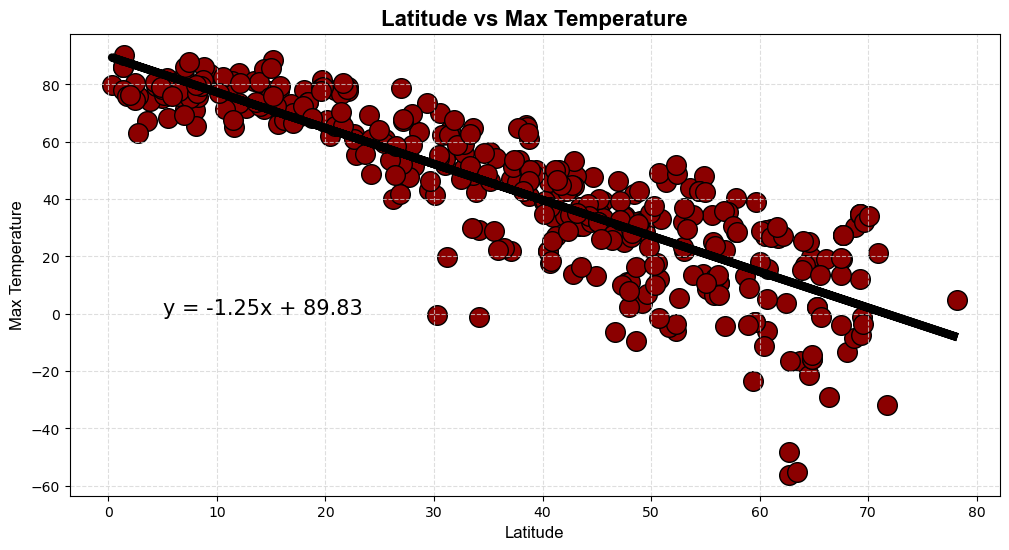

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.5054958226863778
y = 0.36x + 81.49


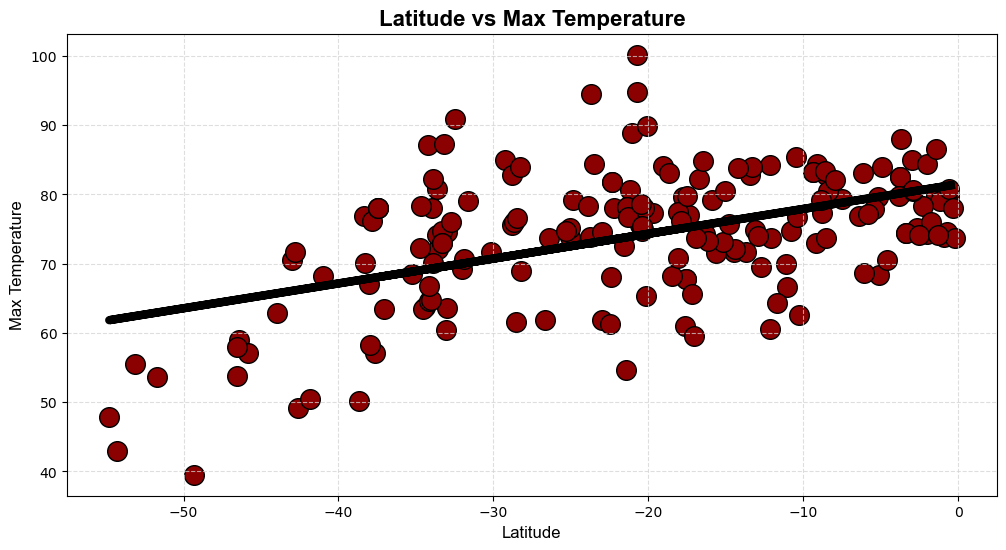

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 


Northern Hemisphere:

Negative Relationship. As latitude increases (moving away from the equator), temperatures generally decrease.
Regression Line: The regression line would have a negative slope, indicating that maximum temperature decreases with increasing latitude.
    
Southern Hemisphere:

Positive Relationship. As latitude decreases (moving further from the equator), temperatures generally decrease. However, landmass 
distribution plays a role.
Regression Line: The regression line would ideally have a positive slope.

Explanations:

Solar Radiation: The Earth receives more concentrated solar radiation near the equator due to the angle of incidence. 
This leads to warmer temperatures at lower latitudes.
Ocean Currents: Ocean currents can transport warm or cool water, influencing temperatures in nearby regions.
Hemispheric Differences:

Landmass Distribution: The Northern Hemisphere has more landmass compared to the Southern Hemisphere. Land heats and cools faster than 
water, leading to larger seasonal temperature variations in the Northern Hemisphere. This can cause the negative relationship between 
latitude and temperature to be more pronounced in the Northern Hemisphere.
    
Southern Hemisphere Considerations:

Ocean Dominance: The Southern Hemisphere has a larger ocean area. Oceans tend to moderate temperature extremes, leading to a potentially 
weaker positive or even a negative correlation between latitude and temperature depending on the data and the influence of ocean currents.
    
Interpretation:

Latitude as a Key Factor: The analysis reinforces that latitude is a major factor influencing temperature, with generally warmer 
temperatures at lower latitudes.
Land-Sea Interaction: The difference in how land and water absorb and release heat plays a significant role, especially in the Northern 
Hemisphere with more landmass.
Ocean Currents: Ocean currents can modify the temperature patterns, particularly in the Southern Hemisphere with its vast ocean regions.
    
Important Considerations:

Data Limitations: The strength of the relationships will depend heavily on the specific data used (time period, location, etc.). 
Seasonal variations can significantly impact the observed trends.


### Humidity vs. Latitude Linear Regression Plot

0.3468215113701524
y = 0.37x + 61.57


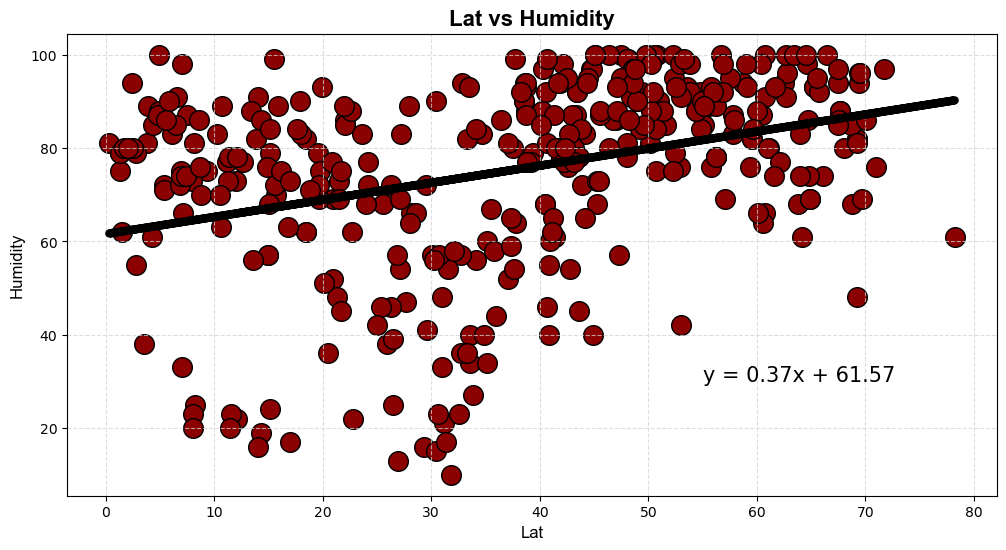

In [20]:
# Northern Hemisphere
# YOUR CODE HERE

# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Lat"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.3170848868882735
y = 0.47x + 83.42


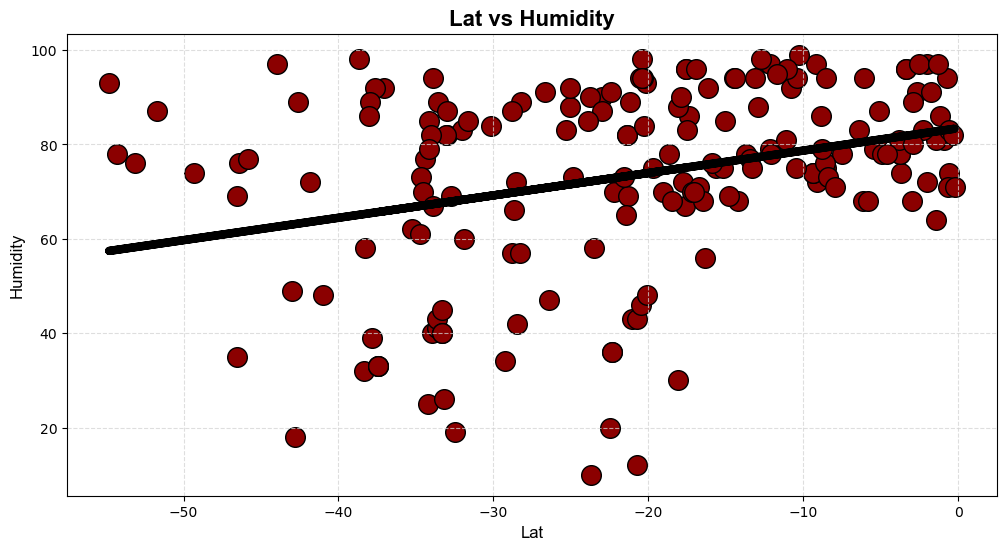

In [21]:
# Southern Hemisphere
# YOUR CODE HERE

# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Lat"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 


Northern Hemisphere:

Positive Relationship. This suggests a tendency for humidity to increase with increasing latitude in the Northern Hemisphere.
Regression Line: The regression line would have a positive slope, indicating that humidity generally increases as you move away 
from the equator.

Southern Hemisphere:

Positive Relationship (Weak). The strength of the relationship might be weaker compared to the Northern Hemisphere.
Regression Line: The regression line would also have a positive slope, but it might be shallower than in the Northern Hemisphere, 
indicating a less pronounced increase in humidity with latitude.

Explanations:

Temperature Effect: Warmer air can hold more moisture, so higher latitudes (generally cooler) tend to have lower humidity.
Ocean Influence: Since oceans are a major source of moisture, areas closer to them (like coastal regions) tend to have higher humidity.
    
Hemispheric Differences:

Landmass Distribution: The Northern Hemisphere has more landmass compared to the Southern Hemisphere. Land heats and cools faster than 
water, leading to larger seasonal temperature variations in the Northern Hemisphere. This can cause more significant fluctuations in 
humidity throughout the year.
Ocean Currents: Ocean currents can transport warm, moist air from the tropics towards higher latitudes, influencing humidity patterns. 
The specific circulation patterns in each hemisphere can affect the strength of the latitude-humidity relationship.
    
Interpretation:

Latitude as a Factor: The analysis highlights that latitude plays a role in influencing humidity, with generally higher humidity at higher 
latitudes. However, the strength of this relationship varies between hemispheres.
Other Factors Dominant: Factors like proximity to oceans and atmospheric circulation patterns likely play a more significant role in 
determining specific humidity levels at any given location.
    
Important Considerations:

Data Limitations: The strength of the relationships will depend heavily on the specific data used (time period, location, etc.).


### Cloudiness vs. Latitude Linear Regression Plot

0.2564711752003011
y = 0.57x + 33.95


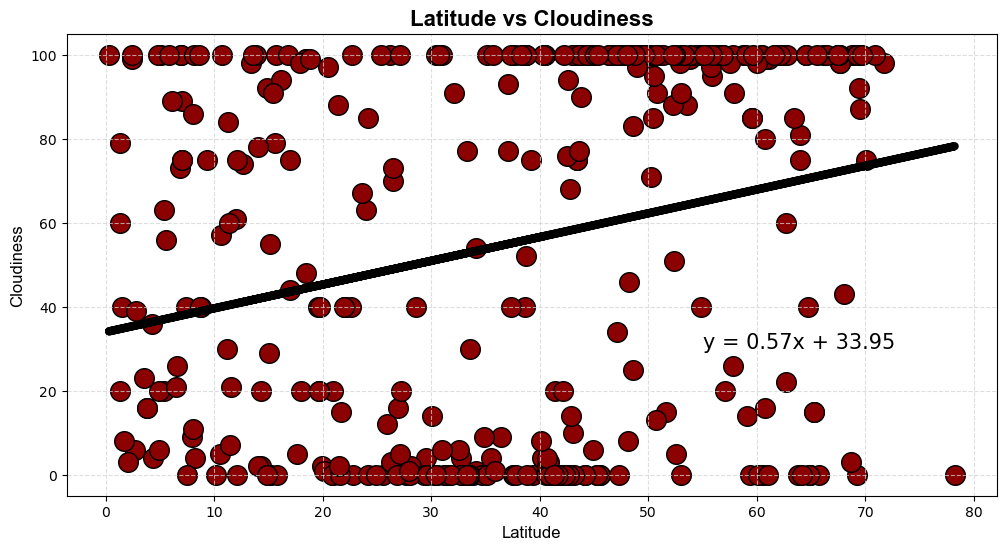

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.18314460849636544
y = 0.55x + 68.32


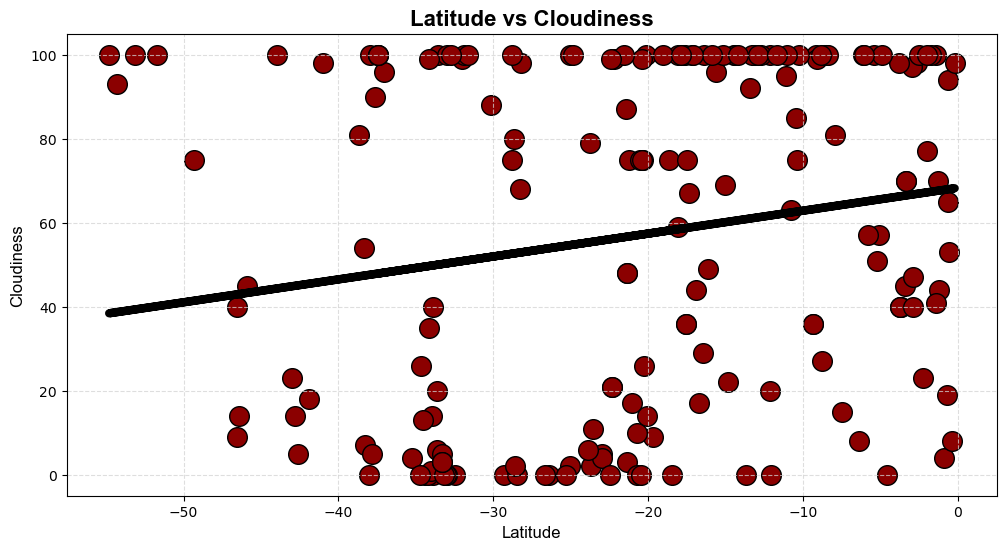

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 


Northern Hemisphere:

Positive Relationship: This could suggest a slight tendency for cloudiness to increase with increasing latitude in the Northern Hemisphere.
Regression Line: The regression line would have a slightly positive slope.

Southern Hemisphere:

Positive Relationship (Weak): Similar to the Northern Hemisphere, a weak positive correlation might be observed.
Regression Line: The regression line would also have a slightly positive slope.
    
Possible Explanations:

Complex Factors: Cloudiness is influenced by various factors, including:

Atmospheric Circulation: Large-scale atmospheric patterns (e.g., jet streams, storm systems) play a significant role in cloud formation.
Land-Sea Interactions: Differences in how land and water absorb and release heat influence atmospheric moisture and cloud formation.
Topography: Mountain ranges can significantly impact cloud formation due to orographic lifting.
Ocean Currents: Ocean currents can influence atmospheric moisture and temperature, affecting cloud cover.
Limited Latitude Effect: While latitude can have some influence on general atmospheric circulation patterns, its direct impact on cloudiness might be less pronounced compared to other factors.

Interpretation:

The positive relationships in both hemispheres suggest that latitude alone is not a strong predictor of cloudiness.
Other Factors Dominant: Other factors, such as atmospheric circulation and local conditions, likely play a more significant role 
in determining cloud cover.
    
Important Considerations:

Data Limitations: The strength of the relationships will depend heavily on the specific data used (time period, location, etc.).


### Wind Speed vs. Latitude Linear Regression Plot

0.13904780117887994
y = 0.05x + 6.83


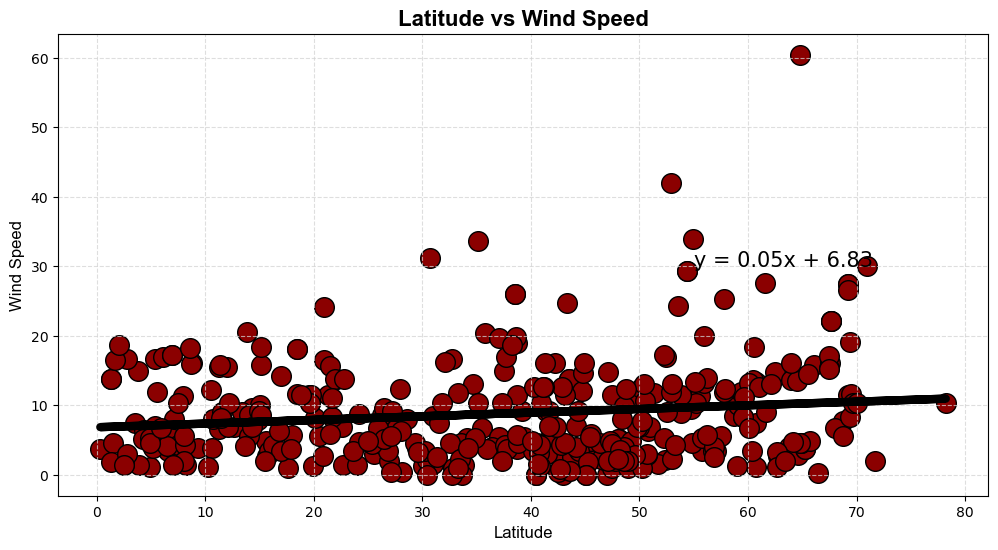

In [25]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.31881194206324265
y = -0.12x + 5.18


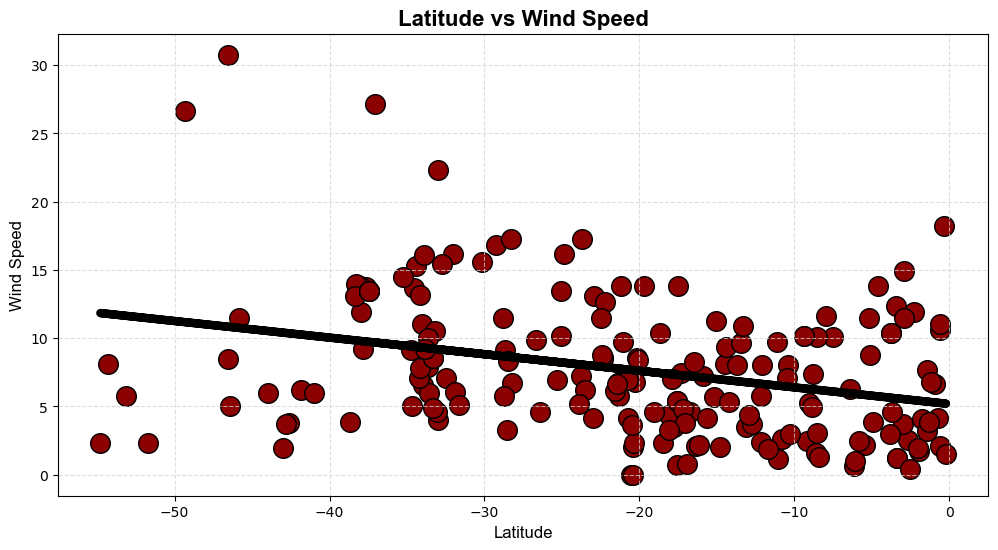

In [27]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** 


Northern Hemisphere:

Positive Relationship (weak): As latitude increases (moving further from the equator), wind speeds generally tend to increase. 
Regression Line: The regression line would have a positive slope, indicating that wind speed increases with increasing latitude.
    
Southern Hemisphere:

Negative Relationship: As latitude decreases (moving further from the equator), wind speeds might slightly increase. 
Regression Line: The regression line would have a negative slope, suggesting that wind speed decreases with increasing latitude.
    
Important Considerations:

Data Limitations: The strength of the relationships will depend heavily on the specific data used (time period, location, etc.).
Other Factors: Latitude is just one factor influencing wind speed. Other important factors include:
Global Wind Belts: Prevailing wind patterns (westerlies, trade winds) are major drivers.
Coriolis Effect: Earth's rotation significantly influences wind direction and speed.
Land-Sea Interactions: Differences in how land and water absorb and release heat create variations in atmospheric pressure and wind patterns.
Ocean Currents: Ocean currents can transfer heat and momentum to the atmosphere, impacting wind speeds.